In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from PIL import ImageDraw

# Description_Question-1

First we have to import an image and convert it into gray scale using open cv tools and display it.Part 1 is done.
Then to count pixels of each object in an image we have to iterate loop in all the pixels of an image ,and find the number of unique pixels other than 0 value(dark pixels) and place them in a dictionary along with their count in an image.Then using put text function write each object count on it place.Part two is done.
Te other way to get number of pixels of each object using open cv , first import the image ,convert in gray scale and then find its threshold where all the objects clearly be observed.then find number of contours and draw them,and at last find the area of each countours , which is the number of pixels of each object.Then find the midpoint of each contours and draw the area of contours at that place.Part 3 is done  


# Question1_Part 1

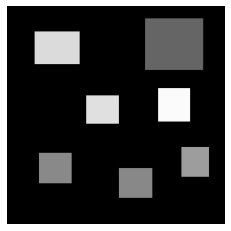

In [2]:
path = "img.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

# Question1_part2

In [3]:
'''
iterate a loop in image to see the row vice  unique pixel values of different items ,
to determine the sequence of objects means ,for example object having pixels value 90 come first if we search in row wise.
find each  pixel value and its count.Creates the dictioanry,  for example in this case  pixel value of 0 comes 71622 times
'''
a = np.array(img)
unique, counts = np.unique(a, return_counts=True)
z=dict(zip(unique, counts))
print((z))

{0: 71622, 1: 590, 2: 107, 3: 48, 4: 32, 5: 11, 6: 3, 7: 2, 8: 2, 83: 1, 85: 1, 87: 1, 88: 5, 89: 5, 90: 76, 91: 5368, 92: 209, 93: 3, 94: 8, 95: 2, 96: 1, 118: 1, 119: 1, 120: 2, 121: 45, 122: 1813, 123: 1899, 124: 10, 125: 3, 126: 2, 136: 1, 137: 1, 138: 3, 139: 8, 140: 9, 141: 1518, 142: 8, 143: 5, 144: 1, 145: 2, 146: 1, 147: 1, 192: 2, 193: 1, 194: 1, 195: 102, 196: 2619, 197: 60, 198: 9, 199: 6, 200: 4, 201: 1686, 202: 43, 203: 5, 204: 4, 205: 2, 207: 1, 221: 1, 222: 2, 223: 9, 224: 97, 225: 1891, 226: 11, 227: 10, 228: 2, 229: 1}


In [4]:
'''
find those pixel values those count are larger means the pixel of objects. and save there count in a list 
'''
color=[]
pixels=[]
for i,j in z.items():
    if j>1000 and i!=0:
        color.append(i)
        pixels.append(j)
print(color)
print(pixels)

[91, 122, 123, 141, 196, 201, 225]
[5368, 1813, 1899, 1518, 2619, 1686, 1891]


In [5]:
'''
arrange them in a sequence or
in a order in which  they appear in a image
'''
new_color=[91,196,225,201,141,123,121]
new_pixels=[5368,2619,1686,1891,1813,1899,1518]
org = [(200,50),(50,60),(110,150),(210,140),(45,230),(155,250),(240,220)]

In [6]:
'''
function to draw a text on the image
'''
def write_on_img(myImg,pxl,org,font,fontScale, color, thickness):
    myImg = cv2.putText(myImg,pxl,org, font,fontScale, color, thickness, cv2.LINE_AA)
    return myImg

In [7]:
'''
reading the image in gray scale and calling a function to write number of pixels on a particular object
'''
path = "img.jpg"
myImg = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
for i in range(7):
    myImg=write_on_img(myImg,str(new_pixels[i]),org[i],cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,10,0),1)

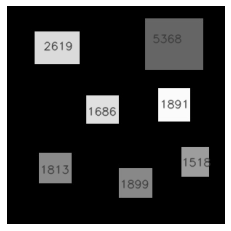

In [8]:
'''
display the final output image
'''
plt.imshow(myImg,cmap='gray')
plt.axis('off')
plt.show()

# Question_1_part3

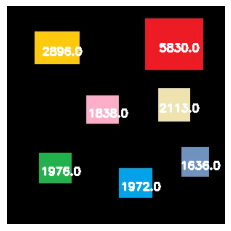

In [9]:
'''
reading the image and convert to gray scale, after than apply binary thresh hold to find only the shapes,
and fin the contours among each object in an image and
than find the area of each contour ,hence find the area or number of pixels in each object.

'''
image = cv2.imread("img.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray,20, 255, cv2.THRESH_BINARY_INV)
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in range(len(contours)):
    ''' skip the first index as it holds the complete image and we need to find the size of objects only in an image'''
    if c==0:
        continue
    # compute the center of the contour
    M = cv2.moments((contours[c]))
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(image, str(cv2.contourArea((contours[c]))), (cX - 20, cY + 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
# show the image
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()